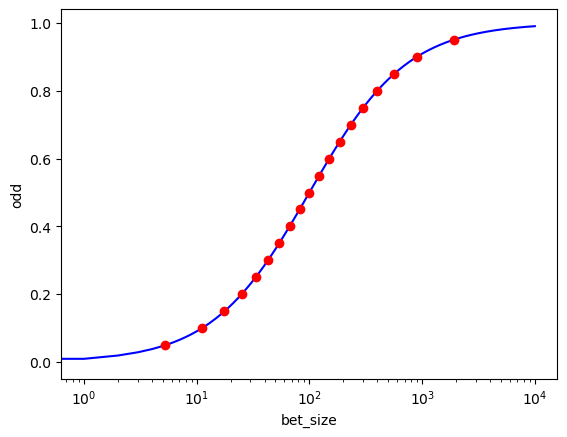

bet_size [   0.            5.26315789   11.11111111   17.64705882   25.
   33.33333333   42.85714286   53.84615385   66.66666667   81.81818182
  100.          122.22222222  150.          185.71428571  233.33333333
  300.          400.          566.66666667  900.         1900.        ]


In [25]:
import matplotlib.pyplot as plt
pot = 100
bet = np.arange(0, 10000, 1)
odd = bet/(pot+bet)

gap = 5
odd_ = np.arange(0, 100/100, 5/100)
bet_ = odd_/(1-odd_)*pot

plt.plot(bet, odd, 'b-')
plt.plot(bet_, odd_, 'ro')
plt.xlabel('bet_size')
plt.ylabel('odd')
plt.xscale('log')
plt.show()
print('bet_size', bet_)

[0.03075264 0.05027106 0.02276823 0.07037817 0.03341866 0.05739306
 0.04100843 0.04429544 0.03800296 0.03143655 0.03625933 0.03404033
 0.10641976 0.04190489 0.04183389 0.02950178 0.04174064 0.0279039
 0.0641496  0.08168667 0.03918984 0.03564413]


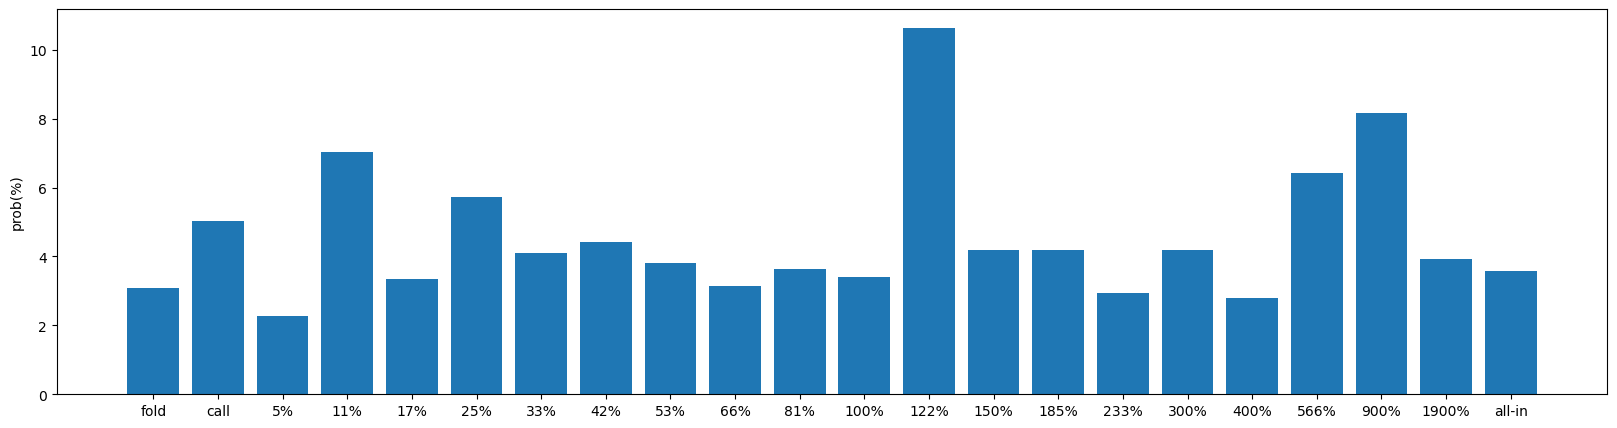

In [69]:
import numpy as np
import torch
from torch import nn
import matplotlib.pyplot as plt

class NNPolicy(nn.Module):
    def __init__(self, n_obs=20, n_act=22, hid_arch=None):
        super().__init__()

        nn_arch = (n_obs,)
        if hid_arch is None:
            nn_arch += (n_act,)
        elif isinstance(hid_arch, int) and hid_arch > 0:
            nn_arch += (hid_arch, n_act)
        elif isinstance(hid_arch, (list, tuple)) and all([isinstance(n_neu, int) and n_neu > 0 for n_neu in hid_arch]):
            nn_arch += tuple(hid_arch) + (n_act,)
        else:
            raise TypeError('hid_arch should be None, positive int, or 1d-list/tuple of positive int')
        
        n_lyr = len(nn_arch)
        net = nn.Sequential()
        for i in range(n_lyr-1):
            if i == n_lyr-2:
                net.append(nn.Linear(nn_arch[i], nn_arch[i+1]))
                net.append(nn.Softmax(dim=-1))
            else:
                net.append(nn.Linear(nn_arch[i], nn_arch[i+1]))
                net.append(nn.ReLU())

        self.net = net

    def forward(self, obs):
        obs = torch.Tensor(obs)
        return self.net(obs).numpy(force=True)
    
nnp = NNPolicy(hid_arch=None)

obs = np.random.rand(20)
pi = nnp(obs)
print(pi)

d = 5
odd = np.arange(d/100, 100/100, d/100)
bet = np.array(odd/(1-odd)*100, dtype=np.int32)

plt.figure(figsize=(20, 5))
plt.bar(np.arange(22), pi*100)
plt.xticks(
    ticks=np.arange(22),
    labels=['fold', 'call'] + [str(b)+'%' for b in bet] + ['all-in']
)
plt.ylabel('prob(%)')
plt.show()

In [112]:
def make_act_code(odd_incr=0.05):
    odd = np.arange(odd_incr, 1, odd_incr)
    bet = np.int32(odd/(1-odd)*100)
    print(bet)

    n_code = len(bet) + 3
    code = {}
    for i in range(n_code):
        if i==0:
            code[i] = 'F'
        elif i==1:
            code[i] = 'C'
        elif i==n_code-1:
            code[i] = 'A'
        else:
            code[i] = f'B_{bet[i-2]}%'
    print(code)
    return code

len(make_act_code())

[   5   11   17   25   33   42   53   66   81  100  122  150  185  233
  300  400  566  900 1900]
{0: 'F', 1: 'C', 2: 'B_5%', 3: 'B_11%', 4: 'B_17%', 5: 'B_25%', 6: 'B_33%', 7: 'B_42%', 8: 'B_53%', 9: 'B_66%', 10: 'B_81%', 11: 'B_100%', 12: 'B_122%', 13: 'B_150%', 14: 'B_185%', 15: 'B_233%', 16: 'B_300%', 17: 'B_400%', 18: 'B_566%', 19: 'B_900%', 20: 'B_1900%', 21: 'A'}


22

In [59]:
from random import shuffle
d = list(range(1, 53))
shuffle(d)
h = np.reshape(d[:12], (6,2))
d[15:16]


[51]

In [68]:
a = np.zeros(10)
a[0:5] = [1, 2, 3] + [4, 5]
a

array([1., 2., 3., 4., 5., 0., 0., 0., 0., 0.])

In [65]:
[0] * 6

[0, 0, 0, 0, 0, 0]

In [79]:
d = {2: '3'}
assert '3' in d

AssertionError: 

In [99]:
str_line = 'BF'
line = '1'
for a in str_line:
    if a == 'C':
        line += '0'
    elif a == 'B':
        line += '1'
line = int(line, 2)
if str_line[-1] == 'F':
    line *= -1

print(line)

-3


In [96]:
int('111', 2)

7

In [104]:
a = 'CB'
a[0:2]

'CB'

In [109]:
r = np.zeros((6, 1))
r[3, 0] = 1.0
r

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [112]:
float('B_100%'[2:-1])

100.0

In [116]:
pb = 2.0
dl = [False, False, False]
bl = [2.0, 0.0, 2.0]
all([print(b==pb or d) for b, d in zip(bl, dl)])

True
False
True


False

In [198]:
d = np.array([False, False, False, False, True])
s = np.arange(0, 5)
s[d]


array([4])

In [204]:
l = ['1', '2', '3']
a = np.array([1, 2, 3])
b = np.array([True, False, True])
l[b]

TypeError: only integer scalar arrays can be converted to a scalar index

In [221]:
np.random.rand(6, 1)

array([[0.88130422],
       [0.17804954],
       [0.25942218],
       [0.33882944],
       [0.38220187],
       [0.46263839]])

In [222]:
len({1: 1, 2: 2})

2

In [224]:
l = []
l.append([])
l

[[]]

In [233]:
type([{'obs':None}][0])

dict

In [234]:
[]+[1]

[1]

In [235]:
h = [30, 10, 10, 10, 10, 10, 5, 5, 5, 5]
s = [1, 2, 2, 2, 2, 2, 3, 3, 3, 3]

0.4444444444444444 0.2222222222222222 0.1111111111111111 0.1111111111111111
